In [1]:
from pandas import Series, DataFrame
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
print(series.head())


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64


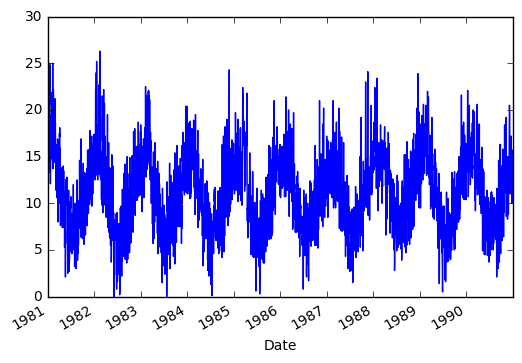

In [3]:
series=series.astype(float)

series.plot()
pyplot.show()

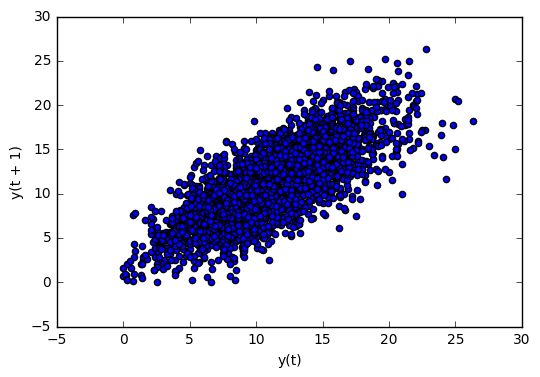

In [4]:
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)

lag_plot(series)
pyplot.show()

In [5]:
type(series)

pandas.core.series.Series

In [6]:
values = DataFrame(series.values)
# print(values)
dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't+1']
print(dataframe)
result = dataframe.corr()
print(result)

       t-6   t-5   t-4   t-3   t-2   t-1   t+1
0      NaN   NaN   NaN   NaN   NaN   NaN  20.7
1      NaN   NaN   NaN   NaN   NaN  20.7  17.9
2      NaN   NaN   NaN   NaN  20.7  17.9  18.8
3      NaN   NaN   NaN  20.7  17.9  18.8  14.6
4      NaN   NaN  20.7  17.9  18.8  14.6  15.8
5      NaN  20.7  17.9  18.8  14.6  15.8  15.8
6     20.7  17.9  18.8  14.6  15.8  15.8  15.8
7     17.9  18.8  14.6  15.8  15.8  15.8  17.4
8     18.8  14.6  15.8  15.8  15.8  17.4  21.8
9     14.6  15.8  15.8  15.8  17.4  21.8  20.0
10    15.8  15.8  15.8  17.4  21.8  20.0  16.2
11    15.8  15.8  17.4  21.8  20.0  16.2  13.3
12    15.8  17.4  21.8  20.0  16.2  13.3  16.7
13    17.4  21.8  20.0  16.2  13.3  16.7  21.5
14    21.8  20.0  16.2  13.3  16.7  21.5  25.0
15    20.0  16.2  13.3  16.7  21.5  25.0  20.7
16    16.2  13.3  16.7  21.5  25.0  20.7  20.6
17    13.3  16.7  21.5  25.0  20.7  20.6  24.8
18    16.7  21.5  25.0  20.7  20.6  24.8  17.7
19    21.5  25.0  20.7  20.6  24.8  17.7  15.5
20    25.0  2

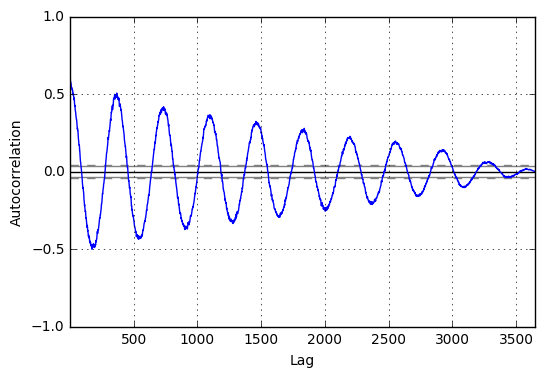

In [7]:
autocorrelation_plot(series)
pyplot.show()

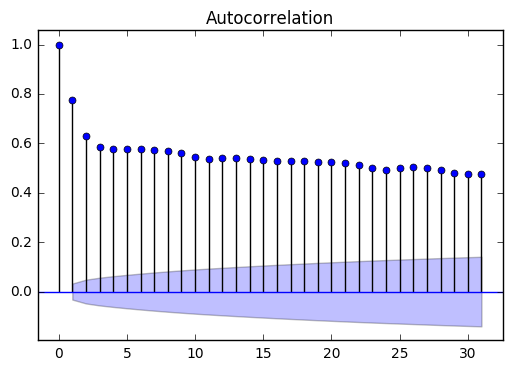

In [86]:
plot_acf(series, lags=31)
pyplot.show()

Test MSE: 3.967


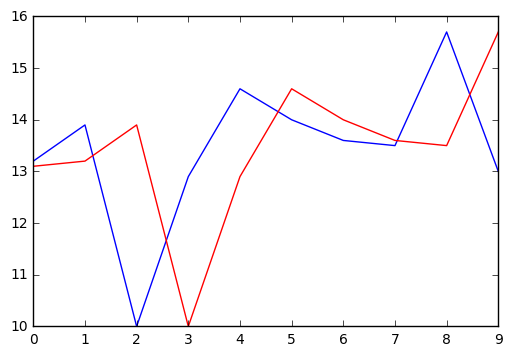

In [90]:
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-10], X[len(X)-10:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 29
Coefficients: [ 0.54267622  0.58944048 -0.09240862  0.04846718  0.04009967  0.04057756
  0.02228761  0.04743705  0.01765179  0.03143756 -0.00123211  0.00572388
  0.01911522  0.02426681  0.00086643  0.02308543  0.01036832  0.01126216
  0.04364494 -0.01464793  0.02647257  0.01484721  0.01442781 -0.02326223
  0.00427428  0.01468161  0.01901724  0.009152    0.00704685 -0.00420412]
predicted=8.034962, expected=5.200000
predicted=9.008108, expected=10.600000
predicted=9.260395, expected=16.300000
predicted=9.088381, expected=9.800000
predicted=9.378486, expected=4.600000
predicted=9.501875, expected=11.100000
predicted=9.359240, expected=8.700000
predicted=9.105891, expected=10.000000
predicted=9.412853, expected=11.300000
predicted=9.651754, expected=10.500000
predicted=9.686307, expected=9.900000
predicted=9.228201, expected=11.000000
predicted=8.944312, expected=14.000000
predicted=9.317721, expected=9.200000
predicted=9.679817, expected=9.800000
predicted=9.817234, expected=6.000

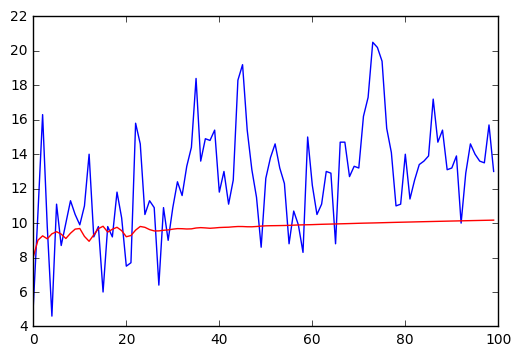

In [94]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# split dataset
X = series.values
train, test = X[1:len(X)-100], X[len(X)-100:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# print(model_fit.params.shape)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=8.034962, expected=5.200000
predicted=7.337067, expected=10.600000
predicted=10.460696, expected=16.300000
predicted=12.953302, expected=9.800000
predicted=9.110896, expected=4.600000
predicted=6.909470, expected=11.100000
predicted=11.061000, expected=8.700000
predicted=8.553211, expected=10.000000
predicted=10.097881, expected=11.300000
predicted=10.808499, expected=10.500000
predicted=10.198713, expected=9.900000
predicted=9.400965, expected=11.000000
predicted=10.067390, expected=14.000000
predicted=12.122658, expected=9.200000
predicted=9.575877, expected=9.800000
predicted=10.418235, expected=6.000000
predicted=7.544280, expected=9.800000
predicted=10.572544, expected=9.200000
predicted=9.516885, expected=11.800000
predicted=11.050347, expected=10.300000
predicted=9.699333, expected=7.500000
predicted=8.310788, expected=7.700000
predicted=8.757919, expected=15.800000
predicted=14.047027, expected=14.600000
predicted=11.875110, expected=10.500000
predicted=9.898120, expe

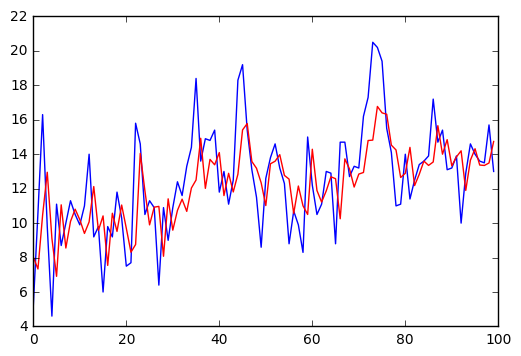

In [96]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# split dataset
X = series.values
train, test = X[1:len(X)-100], X[len(X)-100:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

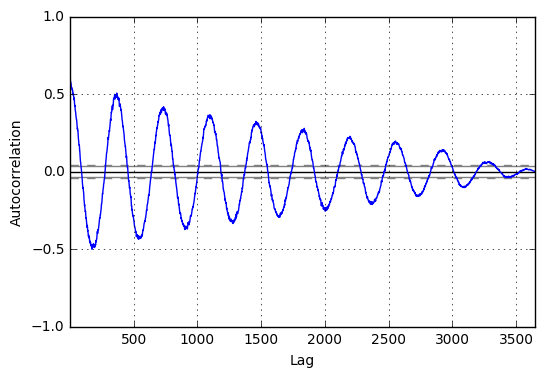

In [101]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

series = read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()


In [103]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors


                                                    ARIMA Model Results                                                    
Dep. Variable:     D.Daily minimum temperatures in Melbourne, Australia, 1981-1990   No. Observations:                 3649
Model:                                                              ARIMA(5, 1, 0)   Log Likelihood               -8495.810
Method:                                                                    css-mle   S.D. of innovations              2.482
Date:                                                             Thu, 04 May 2017   AIC                          17005.620
Time:                                                                     10:45:43   BIC                          17049.036
Sample:                                                                 01-02-1981   HQIC                         17021.082
                                                                      - 12-31-1990                                         
        

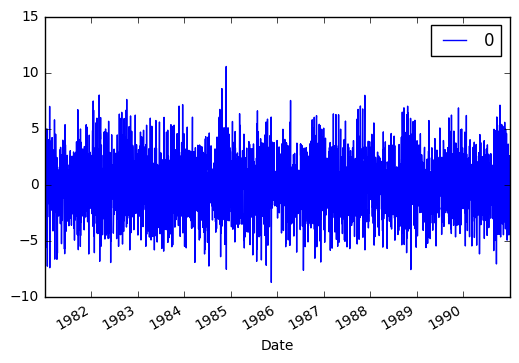

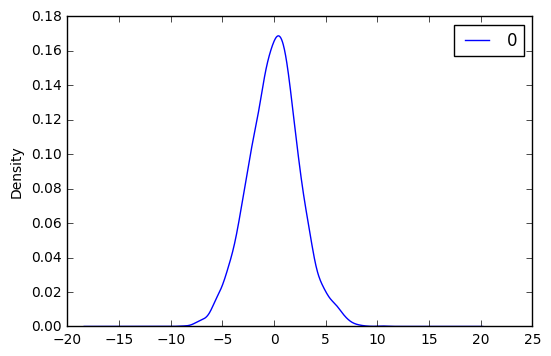

                 0
count  3649.000000
mean     -0.001055
std       2.482981
min      -8.731153
25%      -1.637912
50%       0.063771
75%       1.562933
max      10.547800


In [104]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

0 , predicted=0.031003, expected=1.822247
1 , predicted=1.110276, expected=1.722247
2 , predicted=1.566398, expected=-2.377753
3 , predicted=-1.418223, expected=3.522247
4 , predicted=2.690494, expected=3.522247
5 , predicted=2.170879, expected=1.522247
6 , predicted=1.312856, expected=2.122247
7 , predicted=2.033707, expected=2.022247
8 , predicted=1.599178, expected=5.022247
9 , predicted=4.285778, expected=6.122247
10 , predicted=4.743935, expected=9.322247
11 , predicted=6.858921, expected=9.022247
12 , predicted=6.927313, expected=8.222247
13 , predicted=7.024465, expected=4.322247
14 , predicted=5.219971, expected=2.922247
15 , predicted=4.786002, expected=-0.177753
16 , predicted=2.772170, expected=-0.077753
17 , predicted=2.433669, expected=2.822247
18 , predicted=3.548963, expected=0.222247
19 , predicted=0.760649, expected=1.322247
20 , predicted=1.514415, expected=2.222247
21 , predicted=1.635443, expected=2.422247
22 , predicted=1.819727, expected=2.722247
23 , predicted=2.

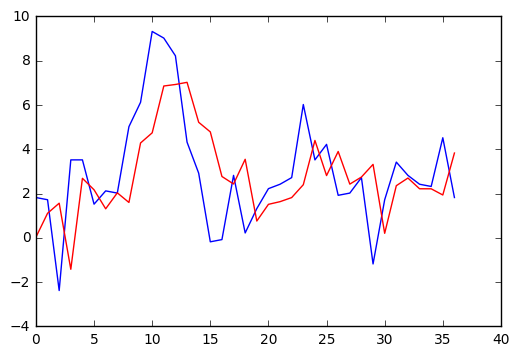

In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = (series - series.mean()) #/ (series.max() - series.min())

X = series.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('%i , predicted=%f, expected=%f' % (t, yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

[ 20.7  17.9  18.8  14.6  15.8  15.8  15.8  17.4  21.8  20.   16.2]
(3603, 10) (37, 10) (3603,) (37,)
11.8965235444
9.77831422708


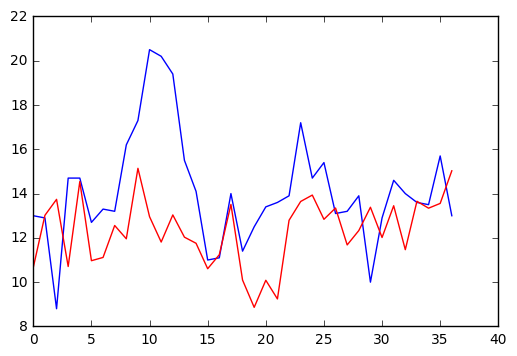

In [27]:
import numpy as np
from pandas import Series, DataFrame
from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import concat
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
%matplotlib inline
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# series = (series - series.mean()) / (series.max() - series.min())

values = DataFrame(series.values)
series=series.astype(float)
np.random.seed(131237)


# print(values)
dataframe = concat([values.shift(10),values.shift(9),values.shift(8),values.shift(7),values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-10','t-9','t-8','t-7','t-6','t-5','t-4','t-3','t-2','t-1', 't']
data = np.array(dataframe.values)
data=data[10:]

# print data[0][-1]
print(data[0])
X_train=data[:int(data.shape[0]*0.990),:-1]
Y_train=data[:int(data.shape[0]*0.990),-1] 
X_test=data[int(data.shape[0]*0.990):,:-1]
Y_test=data[int(data.shape[0]*0.990):,-1] 

print X_train.shape,X_test.shape, Y_train.shape, Y_test.shape



from hpelm import ELM

elm = ELM(X_train.shape[1], 1)
elm.add_neurons(20, "sigm")
elm.add_neurons(32, "sigm")
# elm.add_neurons(5, "sigm")

elm.train(X_train, Y_train, "LOO","OP","r")
# Yunseenpredict = elm.predict(Xunseen)

Y_predict = elm.predict(X_test)
Y_trainpredict = elm.predict(X_train)

print elm.error(Y_trainpredict,Y_train)
print elm.error(Y_predict,Y_test)
pyplot.plot(Y_test)
pyplot.plot(Y_predict, color='red')
pyplot.show()
# ExtraPolX = Xunseen[0,:]

# ExtraPolX = ExtraPolX.reshape(1,numfeatures)
# print ExtraPolX.shape
# ExtraPolY = []
# for i in range(Xunseen.shape[0]):
#     temporary = elm.predict(ExtraPolX)
#     ExtraPolY.append(float(temporary))
#     for j in range(numfeatures-1):
#         ExtraPolX[0,j] = ExtraPolX[0,j+1]
#     ExtraPolX[0,numfeatures-1] = float(temporary)

# ExtraPolY = np.asarray(ExtraPolY)

[ 20.7  17.9  18.8  14.6  15.8  15.8  15.8]
(3607, 6) (37, 6) (3607,) (37,)
6.042209861
5.08408545168


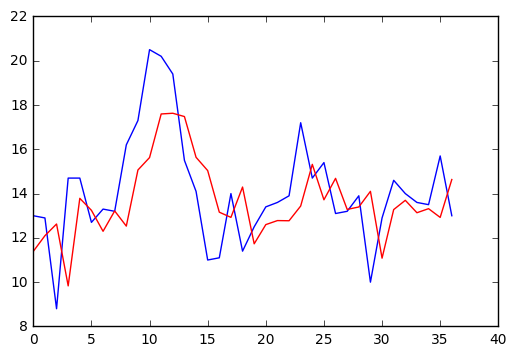

In [3]:
import numpy as np

from matplotlib import pyplot
from pandas.tools.plotting import lag_plot
from pandas import concat
from sklearn.metrics import mean_squared_error
from pandas import Series, DataFrame
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
values = DataFrame(series.values)
series=series.astype(float)
np.random.seed(131237)

# print(values)
dataframe = concat([values.shift(6),values.shift(5),values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-6','t-5','t-4','t-3','t-2','t-1', 't']
data = np.array(dataframe.values)
data=data[6:]

# print data[0][-1]
print(data[0])
X_train=data[:int(data.shape[0]*0.990),:-1]
Y_train=data[:int(data.shape[0]*0.990),-1] 
X_test=data[int(data.shape[0]*0.990):,:-1]
Y_test=data[int(data.shape[0]*0.990):,-1] 

print X_train.shape,X_test.shape, Y_train.shape, Y_test.shape


from sklearn.svm import SVR
model = SVR(
            C=10.0,
            epsilon=0.005,
            kernel='linear',
)
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
Y_trainpredict = model.predict(X_train)

print mean_squared_error(Y_train,Y_trainpredict)
print mean_squared_error(Y_test,Y_predict)
pyplot.plot(Y_test)
pyplot.plot(Y_predict, color='red')
pyplot.show()
# Yunseenpredict = model.predict(Xunseen)

# ExtraPolX = Xunseen[0,:]
# ExtraPolX = ExtraPolX.reshape(1,numfeatures)
# print ExtraPolX.shape
# ExtraPolY = []
# for i in range(Xunseen.shape[0]):
#     temporary = model.predict(ExtraPolX)
#     ExtraPolY.append(float(temporary))
#     for j in range(numfeatures-1):
#         ExtraPolX[0,j] = ExtraPolX[0,j+1]
#     ExtraPolX[0,numfeatures-1] = float(temporary)

# ExtraPolY = np.asarray(ExtraPolY)